In [433]:
import numpy as np 
import matplotlib.pyplot as plt 

In [449]:
nd = 4

In [450]:
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)

(857, 17)


In [451]:
b = [] 
for l in open("test.txt","r").readlines()[0::2]: 
    b.append([float(x) for x in l.split(",")[:-1]])
arr2 = np.array(b); print(arr2.shape)

(857, 6)


In [452]:
arr[0]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   , -0.023, -0.023,  0.023, -0.023, -0.023,  0.023,  0.023,
        0.023])

In [453]:
arr2[0]

array([0.0650538, 0.0650538, 0.046    , 0.046    , 0.046    , 0.046    ])

In [454]:
len(arr[0])

17

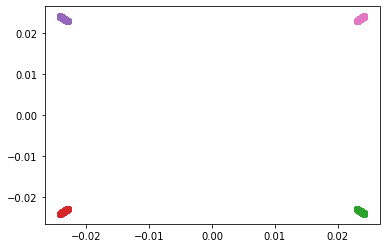

In [455]:
for x in range(2*nd + 1, 4*nd):
    plt.scatter(arr[:,x],arr[:,x+1])


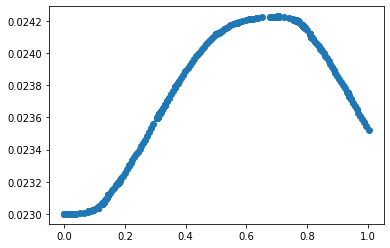

In [456]:
plt.scatter(arr[:,0],arr[:,11])  # real movement

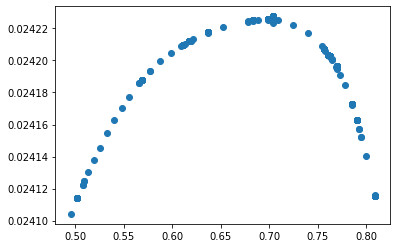

In [457]:
indexer = arr[:,11] > 0.0241
plt.scatter(arr[:,0][indexer],arr[:,11][indexer])  # only upper part close to max

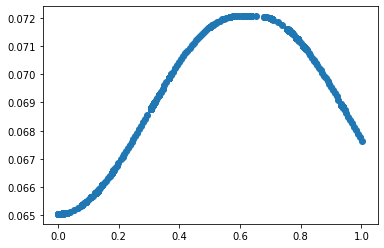

In [458]:
plt.scatter(arr[:,0],arr2[:,1])  # l0 (actuation function)

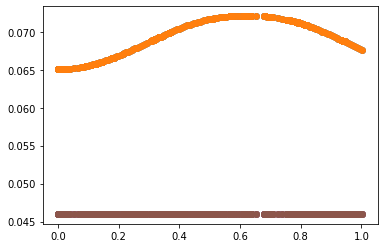

In [459]:
[plt.scatter(arr[:,0],arr2[:,i]) for i in range(len(arr2[0]))]

In [460]:
max(arr[:,0])

1.00316

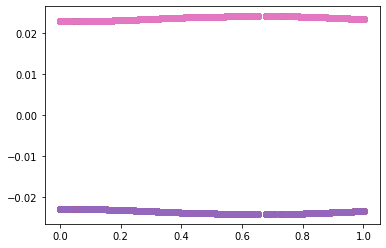

In [463]:
[plt.scatter(arr[:,0],arr[:,i]) for i in range(2*nd+1,4*nd)]

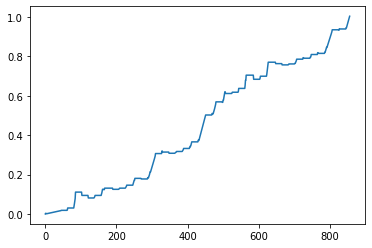

In [462]:
plt.plot(arr[:,0])